# DQN analysis

In [18]:
import os
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%reload_ext autoreload
%autoreload 2

In [19]:
path_1 = r"/home/docker/car_racing/models/other/DuelingDQN_1"
path_2 = r"/home/docker/car_racing/models/other/DuelingDQN_2"
path_3 = r"/home/docker/car_racing/models/other/DuelingDQN_3"
path_4 = r"/home/docker/car_racing/models/other/DuelingDQN_4"

In [20]:
file_1 = os.path.join(path_1, "2024-03-16 164820.043005_DuelingDQN_training_results.json")
file_2 = os.path.join(path_2, "2024-03-17 062730.090939_DuelingDQN_training_results.json")
file_3 = os.path.join(path_3, "2024-03-17 144316.574541_DuelingDQN_training_results.json")
file_4 = os.path.join(path_4, "2024-03-18 063025.504371_DuelingDQN_training_results.json")

with open(file_1, "r") as f:
    data_1 = json.load(f)
with open(file_2, "r") as f:
    data_2 = json.load(f)
with open(file_3, "r") as f:
    data_3 = json.load(f)
with open(file_4, "r") as f:
    data_4 = json.load(f)

In [21]:
def convert_data(data):
    return {key: ast.literal_eval(value) for key, value in data.items()}


In [22]:

data_1 = convert_data(data_1)
data_2 = convert_data(data_2)
data_3 = convert_data(data_3)
data_4 = convert_data(data_4)

In [23]:
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)
df4 = pd.DataFrame(data_4)

In [24]:
keep_cols = ['epsilon', 'time_frame_counter',
    'episode_reward', 'average_rewards', 'loss_evolution']

In [25]:
df1 = df1[keep_cols]
df2 = df2[keep_cols]
df3 = df3[keep_cols]
df4 = df4[keep_cols]

Params:
- DuelingDQN
- Hidden layers 256,
- learning rate 0.00025
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- convolutional network [[(4, 32, (8, 8), (4, 4)), (32, 64, (4, 4), (2, 2)), (64, 256, (2, 2), (1, 1))]]
- gas 1.5

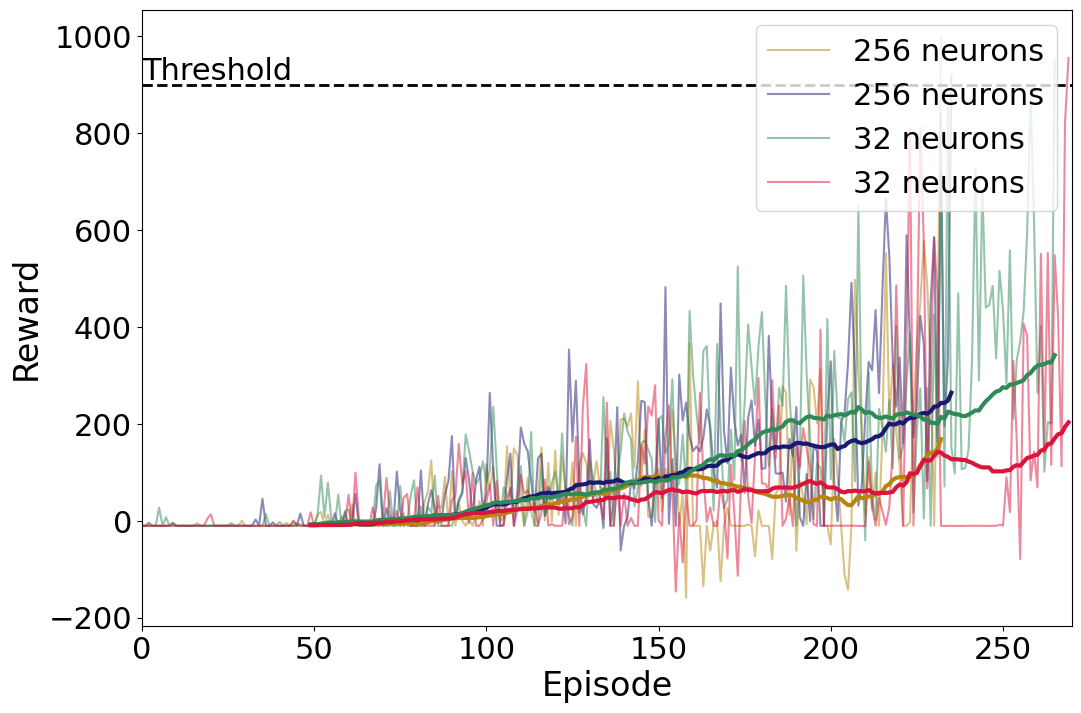

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(df1['episode_reward'], label='256 neurons', color='darkgoldenrod', alpha=0.5)
plt.plot(df2['episode_reward'], label='256 neurons', color='midnightblue', alpha=0.5)
plt.plot(df3['episode_reward'], label='32 neurons', color='seagreen', alpha=0.5)
plt.plot(df4['episode_reward'], label='32 neurons', color='crimson', alpha=0.5)

plt.plot(df1['episode_reward'].rolling(window=50).mean(), color='darkgoldenrod', lw=3)
plt.plot(df2['episode_reward'].rolling(window=50).mean(), color='midnightblue', lw=3)
plt.plot(df3['episode_reward'].rolling(window=50).mean(), color='seagreen', lw=3)
plt.plot(df4['episode_reward'].rolling(window=50).mean(), color='crimson', lw=3)

plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 270)
plt.show()

### DQN vs Dueling DQN (time frames)

Params:
- DQN
- Hidden layers 32,
- learning rate 0.00025
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- convolutional network [[(4, 32, (8, 8), (4, 4)), (32, 64, (4, 4), (2, 2)), (64, 32, (2, 2), (1, 1))]]
- gas 1.5

In [27]:
path_2 = r"/home/docker/car_racing/models/other/DQN_2"

In [28]:
file_6 = os.path.join(path_2, "2024-03-11 115837.233272_DQN_training_results.json")
file_5 = os.path.join(path_2, "2024-03-11 184900.717696_DQN_training_results.json")

with open(file_6, "r") as f:
    data_6 = json.load(f)
with open(file_5, "r") as f:
    data_5 = json.load(f)

In [29]:
data_6 = convert_data(data_6)
data_5 = convert_data(data_5)
df6 = pd.DataFrame(data_6)
df5 = pd.DataFrame(data_5)

In [30]:
df6 = df6[keep_cols]
df5 = df5[keep_cols]

Dueling DQN statistics

In [31]:
df3.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,266.000000,266.000000,266.000000,266.000000,266.000000
mean,0.553687,273.620301,136.274067,75.311007,12.355298
std,0.210458,275.860894,181.841295,87.892002,15.218503
min,0.264921,21.000000,-40.213149,-10.312500,1.072252
25%,0.369265,150.250000,-10.026061,-2.449419,2.389509
50%,0.514706,189.500000,78.461371,34.189715,3.250590
75%,0.717431,296.000000,210.264173,148.334195,26.176696
max,1.000000,2348.000000,951.809091,277.510908,60.361916


In [32]:
df4.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.549360,191.588889,65.530761,31.984165,19.231499
std,0.211857,202.813055,154.632889,39.130435,69.271780
min,0.259662,21.000000,-145.968707,-10.380499,1.107276
25%,0.363754,85.000000,-10.268066,-5.761108,3.310318
50%,0.509572,151.000000,-9.075387,24.306791,9.148741
75%,0.713844,209.500000,76.041744,60.475671,14.941123
max,1.000000,1610.000000,955.505442,136.268441,895.747400


DQN statistics

In [33]:
df5.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.549360,277.318519,101.685706,54.694507,6.436065
std,0.211857,325.003567,154.635030,69.752379,5.084130
min,0.259662,21.000000,-143.069388,-10.337150,1.061280
25%,0.363754,135.500000,-10.161227,-4.954218,3.088328
50%,0.509572,177.500000,41.514167,13.106270,4.146241
75%,0.713844,243.000000,170.812512,121.646171,10.144759
max,1.000000,2017.000000,903.459184,214.629560,18.521082


In [34]:
df6.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,255.000000,255.000000,255.000000,255.000000,255.000000
mean,0.565852,170.109804,36.416288,4.808947,3.830496
std,0.206439,205.851974,116.681231,23.815544,2.697548
min,0.279938,21.000000,-10.741611,-10.327933,1.171165
25%,0.384856,80.000000,-10.368231,-8.038782,1.381044
50%,0.529092,135.000000,-10.121212,-5.702385,4.130236
75%,0.727389,167.000000,18.587459,1.366790,5.291472
max,1.000000,1702.000000,996.977799,102.651861,28.836344


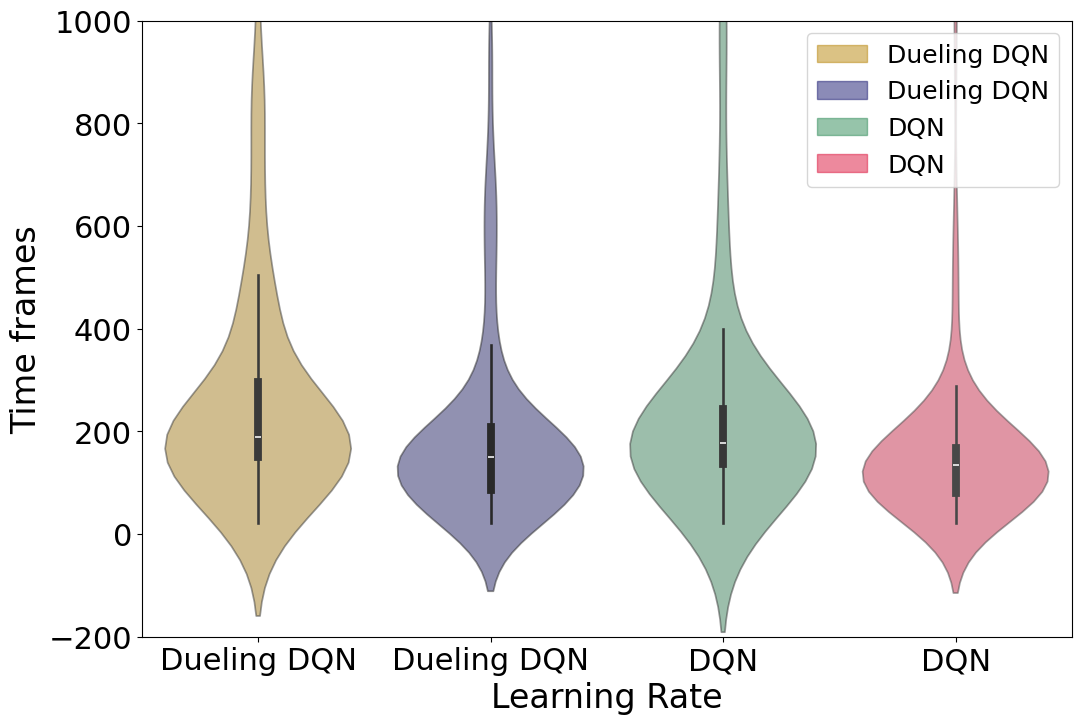

In [40]:
dataframes = [df3, df4, df5, df6]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen', 'crimson']
positions = np.arange(len(dataframes))
labels = ['Dueling DQN', 'Dueling DQN', 'DQN', 'DQN']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Learning Rate', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(-200, 1000)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='upper right')

plt.show()

# Influence of gas weight

Params:
- DQN
- Hidden layers 32,
- learning rate 0.0001
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- convolutional network [[(4, 32, (8, 8), (4, 4)), (32, 64, (4, 4), (2, 2)), (64, 32, (2, 2), (1, 1))]]
- gas 1, 2, 4

In [6]:
path_5 = r"/home/docker/car_racing/models/DQN_7"
path_6 = r"/home/docker/car_racing/models/DQN_8"

In [7]:
file_gas2 = os.path.join(path_5, "2024-03-31 155749.388486_DQN_training_results.json")
file_gas1 = os.path.join(path_6, "2024-04-01 073114.849473_DQN_training_results.json")

with open(file_gas2, "r") as f:
    data_gas2 = json.load(f)
with open(file_gas1, "r") as f:
    data_gas1 = json.load(f)

In [8]:
data_gas2 = convert_data(data_gas2)
df_gas2 = pd.DataFrame(data_gas2)
data_gas1 = convert_data(data_gas1)
df_gas1 = pd.DataFrame(data_gas1)

In [9]:
df_gas2 = df_gas2[keep_cols]
df_gas1 = df_gas1[keep_cols]

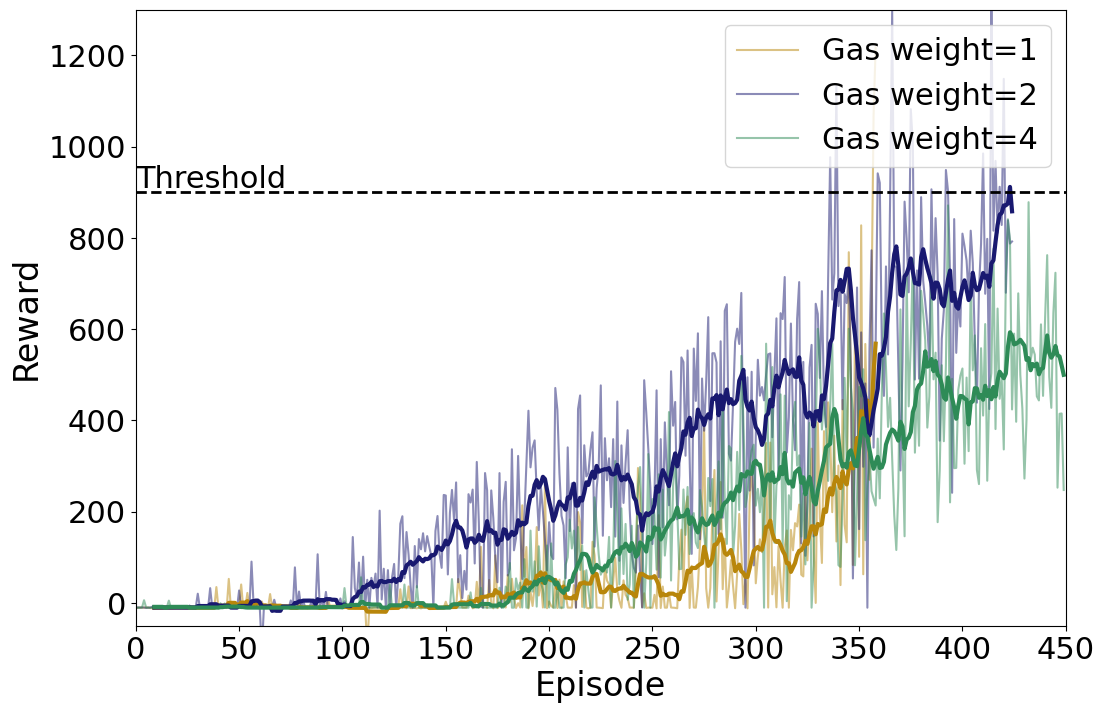

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(df_lr00001['episode_reward'], label='Gas weight=1', color='darkgoldenrod', alpha=0.5)
plt.plot(df_gas2['episode_reward'], label='Gas weight=2', color='midnightblue', alpha=0.5)
plt.plot(df_gas1['episode_reward'], label='Gas weight=4', color='seagreen', alpha=0.5)
plt.plot(df_lr00001['episode_reward'].rolling(window=10).mean(), color='darkgoldenrod', lw=3)
plt.plot(df_gas2['episode_reward'].rolling(window=10).mean(), color='midnightblue', lw=3)
plt.plot(df_gas1['episode_reward'].rolling(window=10).mean(), color='seagreen', lw=3)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 450)
plt.ylim(-50, 1300)

plt.show()

In [54]:
df_gas1.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.397864,150.746667,169.814688,114.460708,7.535957
std,0.249348,49.894658,217.535436,152.220737,5.481825
min,0.105333,22.000000,-10.500000,-10.421815,1.079125
25%,0.184894,116.000000,-10.182239,-8.509245,2.820172
50%,0.324551,176.500000,73.630184,24.307057,5.953256
75%,0.569694,191.000000,305.066879,235.257983,11.405575
max,1.000000,191.000000,878.180077,464.110292,21.715612


In [55]:
df_gas2.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,425.000000,425.000000,425.000000,425.000000,425.000000
mean,0.414683,161.494118,287.968444,202.976731,7.311087
std,0.246446,48.596583,296.216792,210.253983,5.521765
min,0.119395,20.000000,-103.874436,-10.258969,0.943136
25%,0.203114,151.000000,2.839416,-2.951290,3.567394
50%,0.345536,191.000000,204.597087,149.908390,5.274538
75%,0.587823,191.000000,507.659864,366.182316,10.368516
max,1.000000,191.000000,1326.333333,668.590077,25.613676


In [56]:
df_lr00001.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,359.000000,359.000000,359.000000,359.000000,359.000000
mean,0.464969,110.473538,58.399725,20.561555,2.742282
std,0.235735,57.801227,149.539532,41.917933,1.714265
min,0.166212,11.000000,-94.130120,-11.823944,0.961925
25%,0.260315,51.000000,-10.500000,-8.430043,1.238037
50%,0.407691,138.000000,-10.099010,-4.442451,2.329827
75%,0.638509,151.000000,53.048999,37.133218,3.836478
max,1.000000,191.000000,1217.633452,191.162001,9.223064


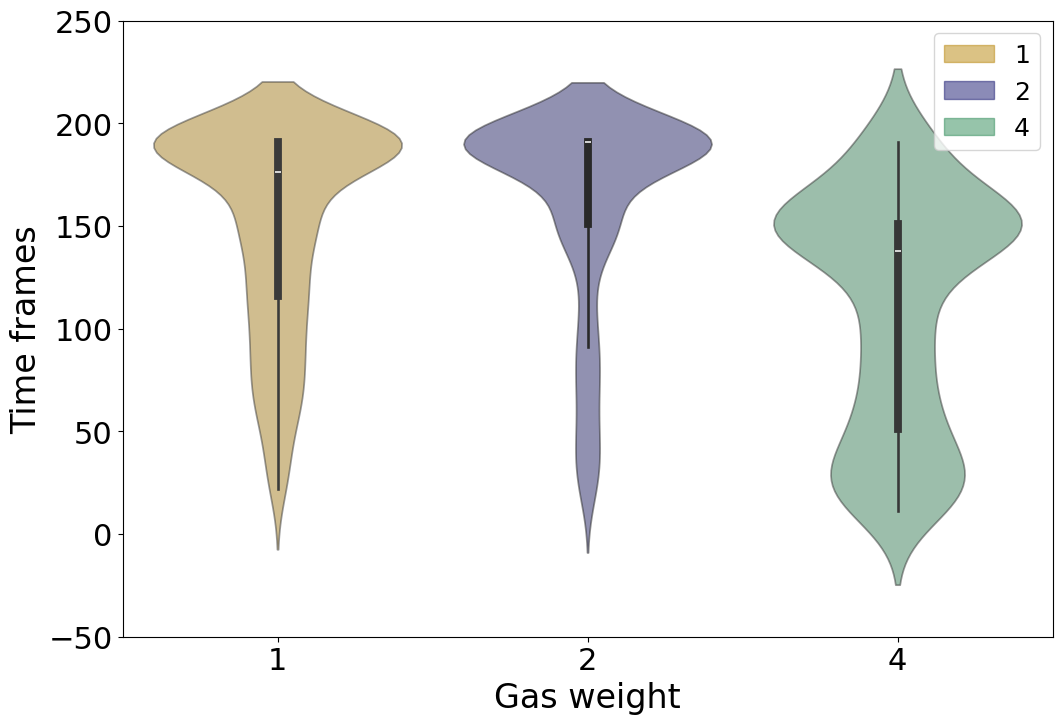

In [53]:
dataframes = [df_gas1, df_gas2, df_lr00001]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen']
positions = np.arange(len(dataframes))
labels = ['1', '2', '4']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Gas weight', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.ylim(-50, 250)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='upper right')

plt.show()